In [1]:
import os

os.chdir('../')
os.getcwd()

'/media/nazirnayal/DATA/projects/attention_long_tail/paying-attention-to-the-long-tail'

In [2]:
import wandb
import pytorch_lightning as pl
import yaml
from transformer_pl import Transformer
from pytorch_lightning.loggers import WandbLogger
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def read_config(path):
    with open(path, "r") as f:
        config = yaml.load(f, Loader=yaml.FullLoader)
    return config


config = read_config('configs/cifar100_config_local.yaml')



if isinstance(config['class_names'], str):
    class_names = read_config(config['class_names'])
    config['class_names'] = list(class_names.values())

In [4]:
model = Transformer(config)
wandb_logger = WandbLogger(name='visualization', job_type='train', log_model=True)
outputs = pl.Trainer(
    gpus=1, 
    profiler='simple',
    logger=wandb_logger
).test(
    model, 
    ckpt_path='paying-attention-to-the-long-tail/2sewnz59/checkpoints/epoch=59-step=81359.ckpt'
)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


Restoring states from the checkpoint path at paying-attention-to-the-long-tail/2sewnz59/checkpoints/epoch=59-step=81359.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
wandb: Currently logged in as: nazirnayal98 (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.12.7 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


Loaded model weights from checkpoint at paying-attention-to-the-long-tail/2sewnz59/checkpoints/epoch=59-step=81359.ckpt


Testing: 0it [00:00, ?it/s]

wandb: WARNING wandb uses only the first 10000 datapoints to create the plots.
TEST Profiler Report

Action                             	|  Mean duration (s)	|Num calls      	|  Total time (s) 	|  Percentage %   	|
---------------------------------------------------------------------------------------------------------------------------------------
Total                              	|  -              	|_              	|  40.396         	|  100 %          	|
---------------------------------------------------------------------------------------------------------------------------------------
run_test_evaluation                	|  31.22          	|1              	|  31.22          	|  77.284         	|
evaluation_step_and_end            	|  0.025478       	|1000           	|  25.478         	|  63.072         	|
test_step                          	|  0.025428       	|1000           	|  25.428         	|  62.947         	|
setup                              	|  1.4993         	|1        

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'class_0_test_accuracy': 0.824999988079071,
 'class_10_test_accuracy': 0.10000000149011612,
 'class_11_test_accuracy': 0.36250001192092896,
 'class_12_test_accuracy': 0.38749998807907104,
 'class_13_test_accuracy': 0.5625,
 'class_14_test_accuracy': 0.32499998807907104,
 'class_15_test_accuracy': 0.22499999403953552,
 'class_16_test_accuracy': 0.38749998807907104,
 'class_17_test_accuracy': 0.574999988079071,
 'class_18_test_accuracy': 0.3499999940395355,
 'class_19_test_accuracy': 0.3125,
 'class_1_test_accuracy': 0.675000011920929,
 'class_20_test_accuracy': 0.574999988079071,
 'class_21_test_accuracy': 0.25,
 'class_22_test_accuracy': 0.17499999701976776,
 'class_23_test_accuracy': 0.875,
 'class_24_test_accuracy': 0.5375000238418579,
 'class_25_test_accuracy': 0.08749999850988388,
 'class_26_test_accuracy': 0.32499998807907104,
 'class_27_test_accuracy': 0.16249999403953552,


In [5]:
outputs = outputs[0]

In [6]:
numericals = [str(i) for i in range(10)]
mp = {}
keys = []
for k in outputs.keys():
    if 'class' in k:
        num_1 = int(k[6])
        num_2 = k[7]
        if num_2 in numericals:
            num_1 = num_1 * 10 + int(num_2)
        mp[num_1] = outputs[k]
        keys.extend([num_1])
        
mp

{0: 0.824999988079071,
 1: 0.675000011920929,
 2: 0.48750001192092896,
 3: 0.36250001192092896,
 4: 0.44999998807907104,
 5: 0.4375,
 6: 0.5625,
 7: 0.4625000059604645,
 8: 0.48750001192092896,
 9: 0.4749999940395355,
 10: 0.10000000149011612,
 11: 0.36250001192092896,
 12: 0.38749998807907104,
 13: 0.5625,
 14: 0.32499998807907104,
 15: 0.22499999403953552,
 16: 0.38749998807907104,
 17: 0.574999988079071,
 18: 0.3499999940395355,
 19: 0.3125,
 20: 0.574999988079071,
 21: 0.25,
 22: 0.17499999701976776,
 23: 0.875,
 24: 0.5375000238418579,
 25: 0.08749999850988388,
 26: 0.32499998807907104,
 27: 0.16249999403953552,
 28: 0.10000000149011612,
 29: 0.17499999701976776,
 30: 0.4749999940395355,
 31: 0.1875,
 32: 0.22499999403953552,
 33: 0.16249999403953552,
 34: 0.1875,
 35: 0.23749999701976776,
 36: 0.23749999701976776,
 37: 0.125,
 38: 0.13750000298023224,
 39: 0.22499999403953552,
 40: 0.02500000037252903,
 41: 0.512499988079071,
 42: 0.17499999701976776,
 43: 0.11249999701976776,
 4

In [8]:
keys.sort()

In [9]:
values = [mp[k] for k in keys]

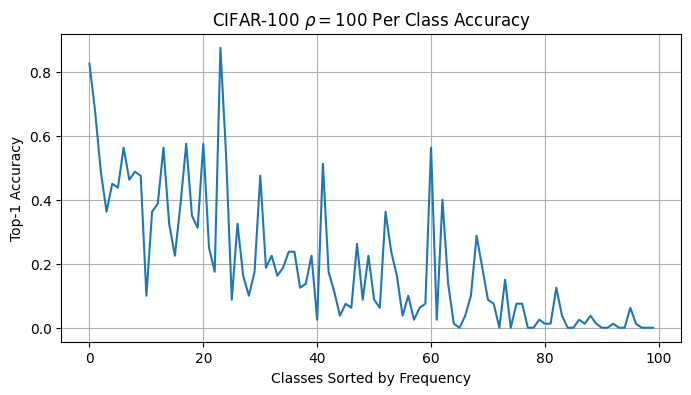

In [12]:
plt.figure(figsize=(8,4))
plt.grid()
plt.plot(keys, values)
plt.title(r'CIFAR-100 $\rho = 100$ Per Class Accuracy')
plt.xlabel('Classes Sorted by Frequency')
plt.ylabel('Top-1 Accuracy')
plt.show()

In [11]:
wandb.finish()

class_0_test_accuracy,▁
class_10_test_accuracy,▁
class_11_test_accuracy,▁
class_12_test_accuracy,▁
class_13_test_accuracy,▁
class_14_test_accuracy,▁
class_15_test_accuracy,▁
class_16_test_accuracy,▁
class_17_test_accuracy,▁
class_18_test_accuracy,▁
class_19_test_accuracy,▁
